**Predicting the type of skin lesion in the image.**

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,GlobalAveragePooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

2024-04-08 18:13:06.084536: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 18:13:06.084698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 18:13:06.208766: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

In [4]:
data.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


In [5]:
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


**Preprocessing**

In [6]:
data.isna().sum().sum()

0

In [7]:
y = data['label'].copy()
X = data.drop('label', axis = 1).copy()

In [8]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()
X,y = oversample.fit_resample(X, y)
X = np.array(X).reshape(-1, 28, 28, 3)
print('Shape of Data :', X.shape)

Shape of Data : (46935, 28, 28, 3)


In [9]:
y.value_counts()

label
2    6705
4    6705
3    6705
6    6705
5    6705
1    6705
0    6705
Name: count, dtype: int64

*^the data imbalance can be dealt with data augmentation in the under-represented classes.*

In [10]:
label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

**Rescaling**

In [11]:
X = X/255

In [12]:
X = np.array(X)
print(X.shape)

(46935, 28, 28, 3)


In [13]:
X = X.reshape(-1,28,28,3)
print(X.shape)

(46935, 28, 28, 3)


**Visualising**

In [14]:
sample_data = pd.Series(list(zip(X,y))).sample(9)

sample_X = np.stack(np.array(sample_data.apply(lambda x : x[0])))
sample_y = np.array(sample_data.apply(lambda x : x[1]))

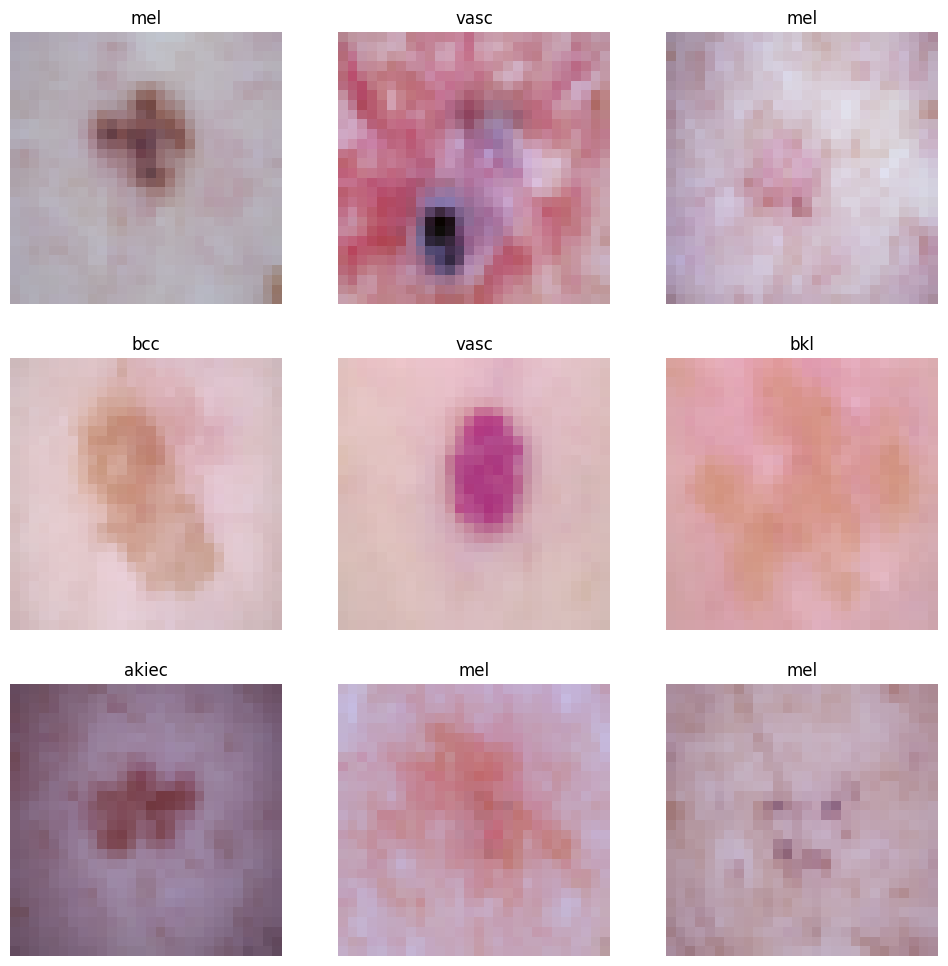

In [15]:
plt.figure(figsize = (12,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(np.squeeze(sample_X[i]))
    img_label = label_mapping[sample_y[i]]
    plt.title(img_label)
    plt.axis('off')
plt.show()

**Train-Test Split**

In [16]:
(X_train, X_test, y_train,y_test) = train_test_split(X,y,train_size=0.7, random_state=123)

**Early Stopping**

In [18]:
callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

**Modeling**

In [19]:
model = Sequential()

model.add(Conv2D(16, kernel_size = (3,3),padding='valid',activation='relu', input_shape=(28,28,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides=2,padding='valid'))

model.add(GlobalAveragePooling2D())

model.add(Dense(7, activation ='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,039 (93.90 KB)

 Trainable params: 24,039 (93.90 KB)

 Non-trainable params: 0 (0.00 B)

None


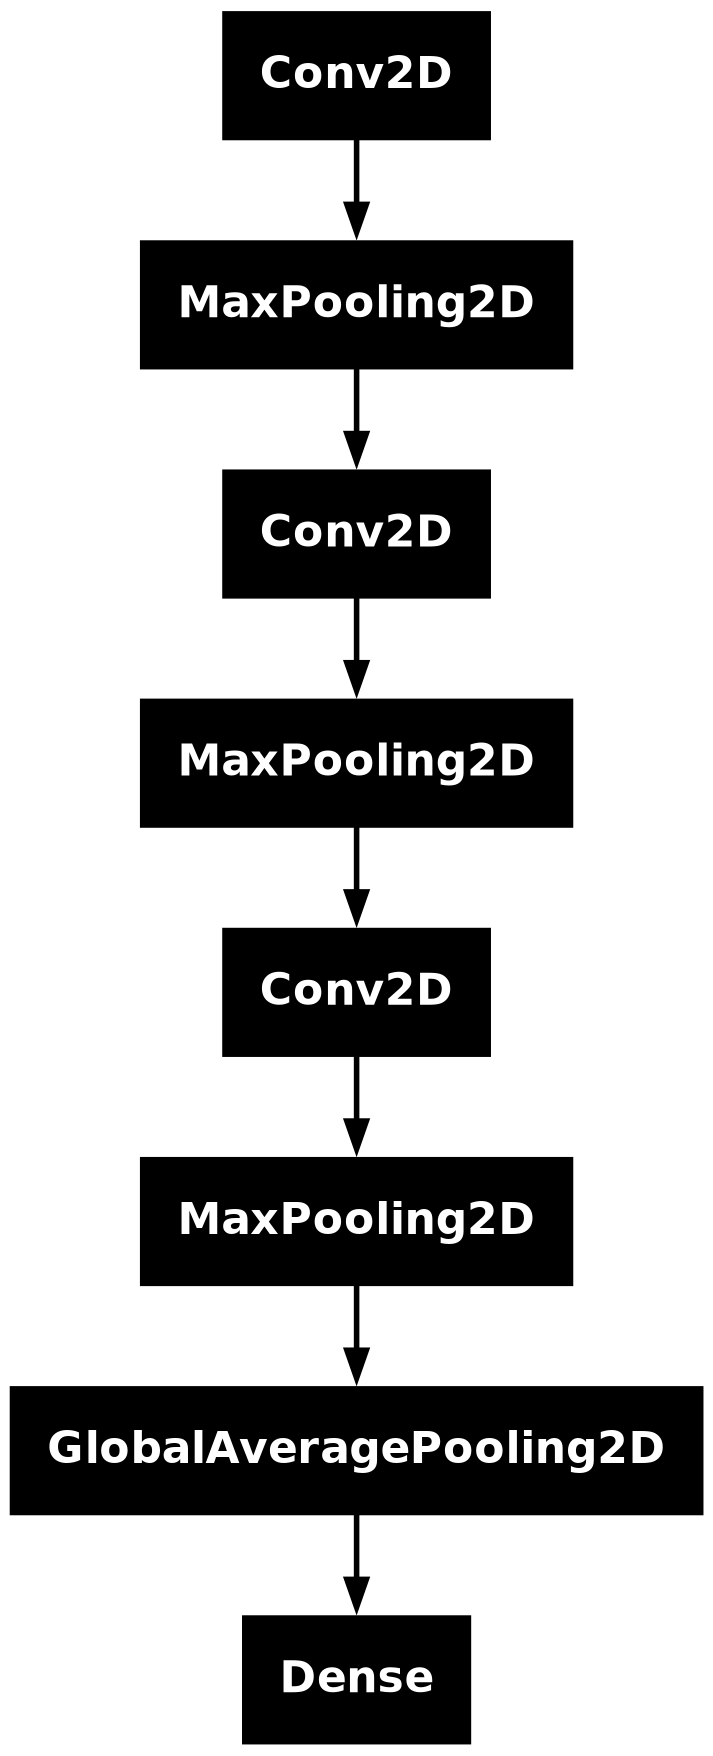

In [20]:
print(model.summary())
plot_model(model)

**Training**

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,validation_split=0.2, batch_size=32, epochs=50, callbacks=callback)

Epoch 1/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.3234 - loss: 1.6683 - val_accuracy: 0.4820 - val_loss: 1.2852
Epoch 2/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5530 - loss: 1.1733 - val_accuracy: 0.5894 - val_loss: 1.0950
Epoch 3/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6153 - loss: 1.0171 - val_accuracy: 0.6482 - val_loss: 0.9486
Epoch 4/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6614 - loss: 0.9100 - val_accuracy: 0.6839 - val_loss: 0.8490
Epoch 5/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6972 - loss: 0.8274 - val_accuracy: 0.7229 - val_loss: 0.7794
Epoch 6/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7335 - loss: 0.7400 - val_accuracy: 0.7504 - val_loss: 0.6929
Epoch 7/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7495 - loss: 0.6805 - val_accuracy: 0.7614 - val_loss: 0.6677
Epoch 8/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7748 - loss: 0.6230 - val_ac

In [23]:
model_acc = model.evaluate(X_test,y_test, verbose = 0)[1]

print("Test Accuracy: {:.3f}%".format(model_acc*100))

Test Accuracy: 91.570%


In [24]:
y_true = np.array(y_test)

y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [25]:
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true,y_pred, target_names=label_mapping.values())

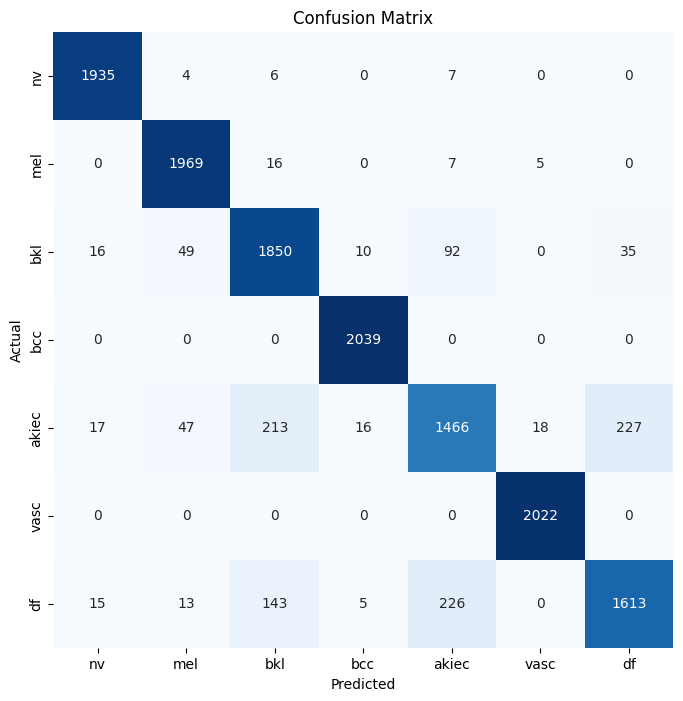

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')

plt.xticks(np.arange(7)+0.5 ,label_mapping.values())
plt.xlabel("Predicted")
plt.yticks(np.arange(7)+0.5 ,label_mapping.values())
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [31]:
print(clr)

              precision    recall  f1-score   support

          nv       0.98      0.99      0.98      1952
         mel       0.95      0.99      0.97      1997
         bkl       0.83      0.90      0.86      2052
         bcc       0.99      1.00      0.99      2039
       akiec       0.82      0.73      0.77      2004
        vasc       0.99      1.00      0.99      2022
          df       0.86      0.80      0.83      2015

    accuracy                           0.92     14081
   macro avg       0.91      0.92      0.91     14081
weighted avg       0.91      0.92      0.91     14081

